In [1]:
%%time
import MDAnalysis

traj1 = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','../../sim/dcd/complexwfe-g130_1.dcd')
traj2 = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','../../sim/dcd/complexwfe-g130_2.dcd')
traj3 = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','../../sim/dcd/complexwfe-g130_3.dcd')
traj4 = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','../../sim/dcd/complexwfe-g130_4.dcd')
traj5 = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','../../sim/dcd/complexwfe-g130_5.dcd')
traj6 = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','../../sim/dcd/complexwfe-g130_6.dcd')
traj7 = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','../../sim/dcd/complexwfe-g130_7.dcd')
traj8 = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','../../sim/dcd/complexwfe-g130_8.dcd')
traj9 = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','../../sim/dcd/complexwfe-g130_9.dcd')
traj10 = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','../../sim/dcd/complexwfe-g130_10.dcd')
traj = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop', 
                           ['../../sim/dcd/complexwfe-g130_1.dcd',
                           '../../sim/dcd/complexwfe-g130_2.dcd',
                            '../../sim/dcd/complexwfe-g130_3.dcd',
                            '../../sim/dcd/complexwfe-g130_4.dcd',
                            '../../sim/dcd/complexwfe-g130_5.dcd',
                            '../../sim/dcd/complexwfe-g130_6.dcd',
                            '../../sim/dcd/complexwfe-g130_7.dcd',
                            '../../sim/dcd/complexwfe-g130_8.dcd',
                            '../../sim/dcd/complexwfe-g130_9.dcd',
                            '../../sim/dcd/complexwfe-g130_10.dcd',                         
                           ])
wt_traj = MDAnalysis.Universe('../../complexwfe_wt.prmtop', [
                            '../../complexwfe_1.dcd',
                            '../../complexwfe_2.dcd',
                            '../../complexwfe_3.dcd',
                            '../../complexwfe_4.dcd',
                            '../../complexwfe_5.dcd',
                            '../../complexwfe_6.dcd',
                            '../../complexwfe_7.dcd',
                            '../../complexwfe_8.dcd',
                            '../../complexwfe_9.dcd',
                            '../../complexwfe_10.dcd',
                            ])


CPU times: user 48.7 s, sys: 1.91 s, total: 50.6 s
Wall time: 54.8 s


In [2]:
traj.trajectory

<ChainReader containing complexwfe-g130_1.dcd and 9 more with 10000 frames of 265303 atoms>

In [3]:
from MDAnalysis.analysis.rms import rmsd #pull in rmsd function
prot = traj.select_atoms("protein") #only care about protein, not water/ions
refcoord = prot.positions #save initial coordinates
rmsds = [rmsd(refcoord,prot.positions) for ts in traj.trajectory]  #coordinates implicitly update as you iterat

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

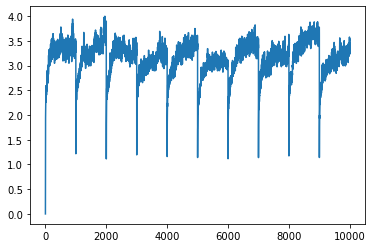

In [5]:
plt.plot(rmsds)

In [6]:
%%time
from MDAnalysis.analysis.align import AlignTraj
#align to loop

align = AlignTraj(traj, traj, select='backbone',filename='aligned.dcd')
align.run() 


/net/dali/home/mscbio/tas242/.local/lib/python3.7/site-packages/MDAnalysis/coordinates/DCD.py:430: UserWarning: No dimensions set for current frame, zeroed unitcell will be written
  warnings.warn(wmsg)


CPU times: user 1h 2min 36s, sys: 5min 19s, total: 1h 7min 55s
Wall time: 10min 15s


In [7]:
wt_align = AlignTraj(wt_traj, wt_traj, select='backbone', filename='wt_aligned.dcd')
wt_align.run()

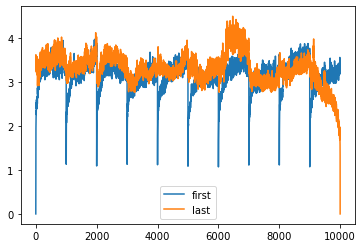

In [8]:
traj = MDAnalysis.Universe('../../sim/complexwfe-g130.prmtop','aligned.dcd')
wt_traj = MDAnalysis.Universe('complexwfe_wt.prmtop', 'wt_aligned.dcd')
prot = traj.select_atoms("protein") #only care about protein, not water/ions
refcoord = prot.positions #save initial coordinates
rmsds = [rmsd(refcoord,prot.positions) for ts in traj.trajectory] 
traj.trajectory[-1] #set to last frame
lastcoord = prot.positions
lastrmsds = [rmsd(lastcoord,prot.positions) for ts in traj.trajectory]

plt.plot(rmsds,label='first')
plt.plot(lastrmsds,label='last')
plt.legend();

In [9]:
#loading all the coordinates into memory takes about 1GB
coords = [prot.positions for ts in traj.trajectory]

In [10]:
from MDAnalysis.analysis import pca
pc = pca.PCA(wt_traj, select='name CA').run()

In [11]:
pc.transform(traj.select_atoms(sel='name CA'))

#plot

/net/dali/home/mscbio/tas242/.local/lib/python3.7/site-packages/MDAnalysis/analysis/pca.py:408: UserWarning: Atom types do not match with types used to fit PCA
  warnings.warn('Atom types do not match with types used to fit PCA')


array([[  2.56961205, -25.8933441 ,   1.15118255, ...,   0.77277387,
         -0.40103157,   0.38598744],
       [  4.31473807, -29.98316879,  -1.1535591 , ...,   0.89408571,
         -0.3408389 ,   0.46314232],
       [  2.29654725, -31.91986003,  -2.16388433, ...,   0.80768471,
         -0.40913045,   0.472437  ],
       ...,
       [ 42.88627686,  24.83008812,   7.63068626, ...,   0.94057258,
         -0.30851205,   0.556387  ],
       [ 35.08831166,  27.87003389,  10.98883803, ...,   0.87079119,
         -0.453237  ,   0.49940459],
       [ 42.54948043,  27.16234299,  10.18410722, ...,   0.93757902,
         -0.33709992,   0.5081412 ]])

/net/dali/home/mscbio/tas242/.local/lib/python3.7/site-packages/MDAnalysis/analysis/pca.py:345: DeprecationWarning: The `cumulated_variance` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.cumulated_variance` instead.
  warnings.warn(wmsg, DeprecationWarning)


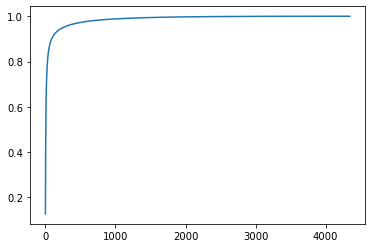

In [12]:
plt.plot(pc.cumulated_variance)

In [13]:
backbone = traj.select_atoms('name CA')
backbone

<AtomGroup with 1448 atoms>

/net/dali/home/mscbio/tas242/.local/lib/python3.7/site-packages/MDAnalysis/analysis/pca.py:345: DeprecationWarning: The `cumulated_variance` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.cumulated_variance` instead.
  warnings.warn(wmsg, DeprecationWarning)


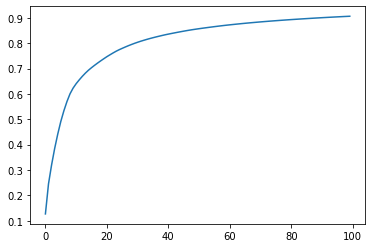

In [14]:
plt.plot(pc.cumulated_variance[:100])

In [15]:
transformed = pc.transform(backbone, n_components=10)

/net/dali/home/mscbio/tas242/.local/lib/python3.7/site-packages/MDAnalysis/analysis/pca.py:408: UserWarning: Atom types do not match with types used to fit PCA
  warnings.warn('Atom types do not match with types used to fit PCA')


In [16]:
import pandas as pd
df = pd.DataFrame(transformed,
                  columns=['PC{}'.format(i+1) for i in range(10)])
df['sim'] = df.index//1000
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sim
0,2.569612,-25.893344,1.151183,2.509138,3.066446,-3.543717,2.610403,2.937649,6.255882,-5.837340,0
1,4.314738,-29.983169,-1.153559,11.529633,4.563878,-2.060111,3.721760,1.304668,4.444224,-8.245700,0
2,2.296547,-31.919860,-2.163884,8.677674,0.679028,-0.184219,1.578463,4.078104,6.698264,-3.568045,0
3,-3.219648,-41.666987,2.558666,5.170755,11.302587,-2.245747,3.415630,7.343274,7.666881,-4.369893,0
4,1.663209,-30.685313,3.404500,4.712608,7.145813,1.411902,0.094529,3.923616,9.903082,-4.147806,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,34.392898,15.498018,4.808085,-4.092893,18.524376,-12.968214,2.518480,-7.834015,3.929006,2.914849,9
9996,42.053148,25.254018,5.294481,-5.542419,20.918781,-15.503436,3.594758,-3.748438,2.555035,0.379611,9
9997,42.886277,24.830088,7.630686,-4.509212,21.579122,-16.557111,7.685613,-8.102361,-5.461161,6.062868,9
9998,35.088312,27.870034,10.988838,-10.302040,21.691379,-13.082237,1.927088,-7.044542,-1.177169,2.498444,9


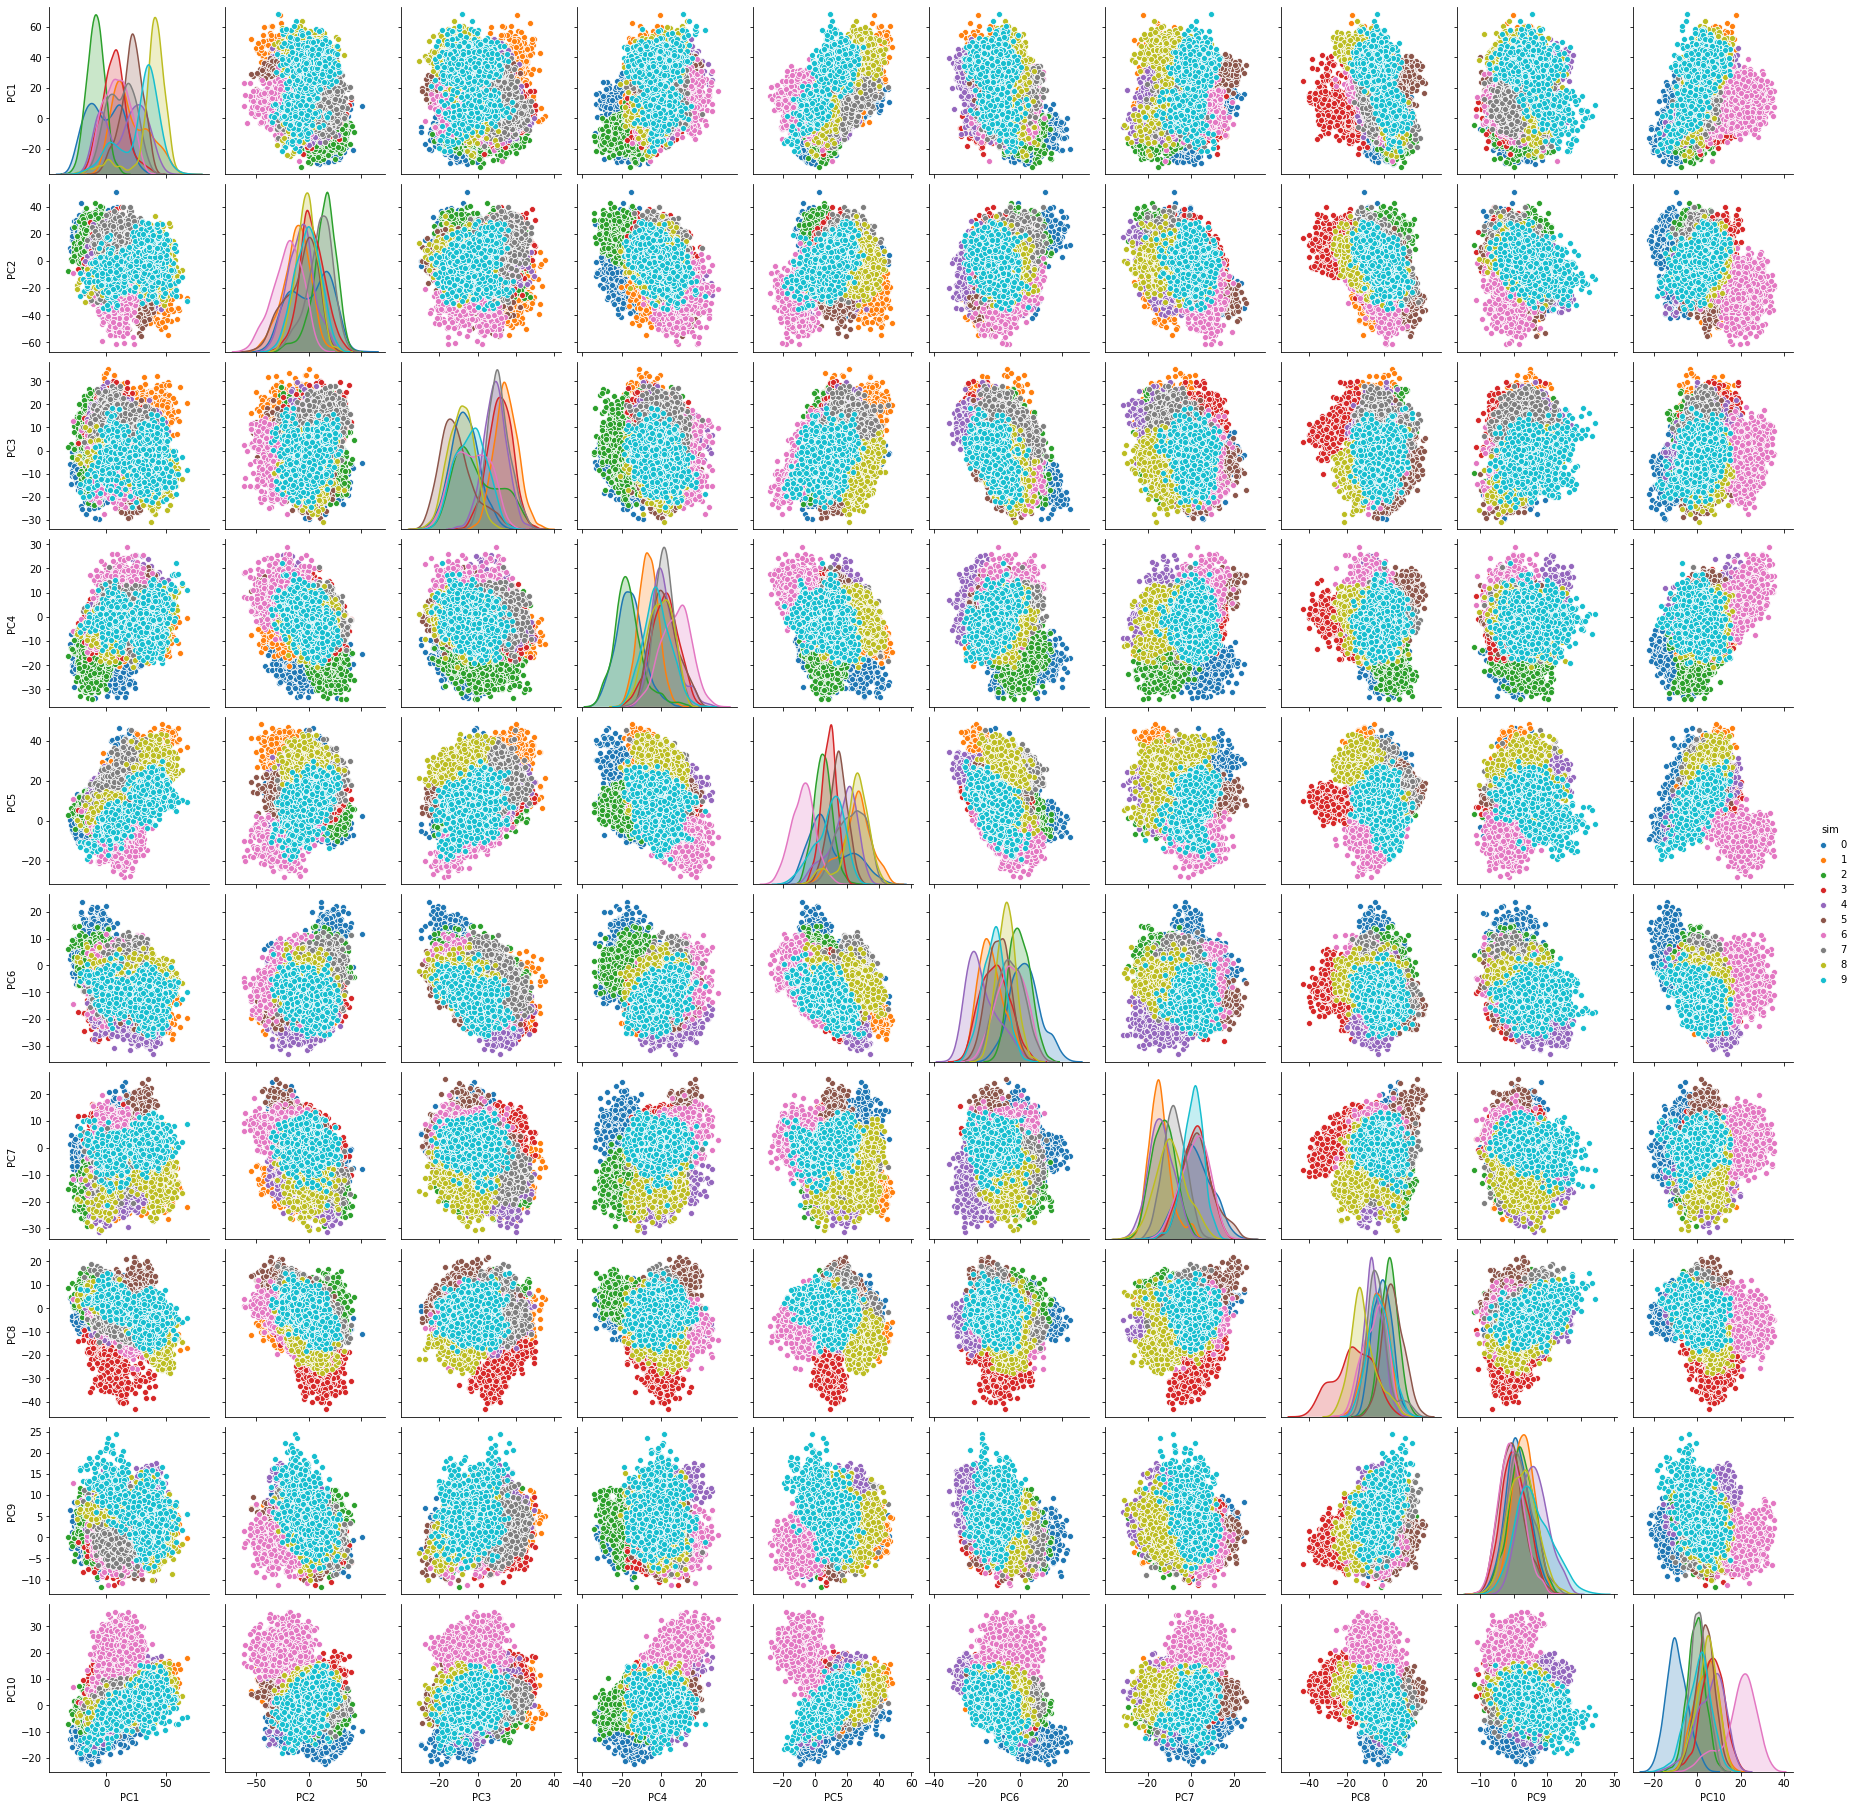

In [17]:
import seaborn as sns
g = sns.pairplot(df,vars=('PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'),hue='sim')